### Welcome to my Notebook !!

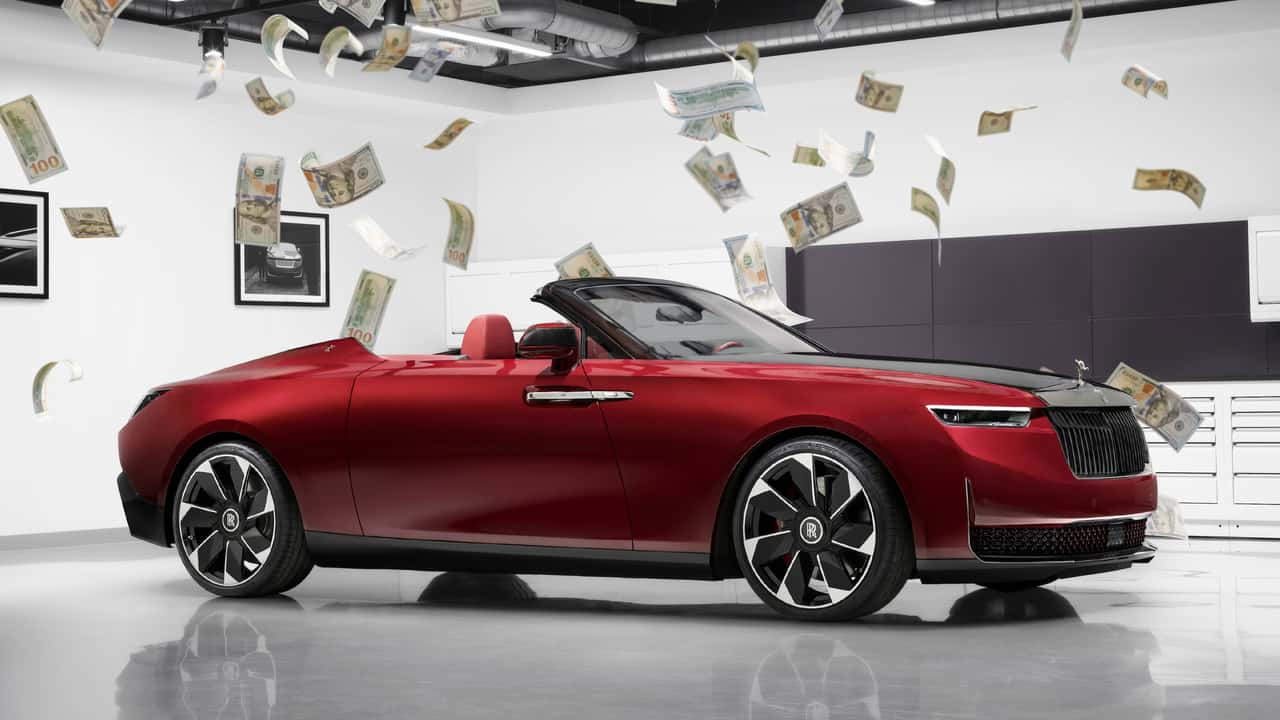

### The objective of this project is to predict Car Selling Price 💰🚗

### Import Relevant Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### Loading Dataset

In [2]:
train_df = pd.read_csv('car data.csv')

### Basic Understanding of Data

In [3]:
train_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
train_df.shape

(301, 9)

In [5]:
train_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
train_df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
train_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
train_df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Exploratory Data Analysis (EDA) and Feature Engineering

In [10]:
data = train_df.copy()

In [11]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# Car_Name Analysis
# Check unique values and their counts
top_10_car_name = data['Car_Name'].value_counts().head(10)
print(f"Number of unique car names: {data['Car_Name'].nunique()}")
print("Top 10 car names and their counts:")
print(top_10_car_name)

Number of unique car names: 98
Top 10 car names and their counts:
Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64


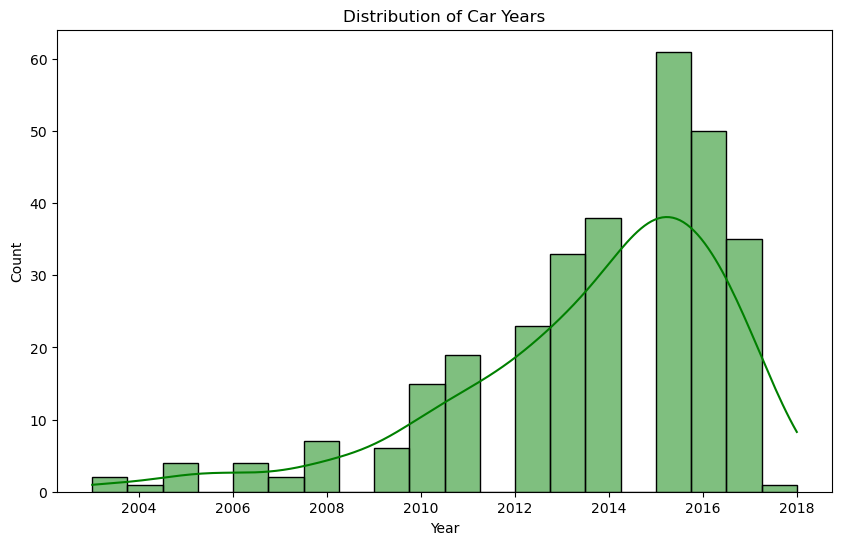

In [13]:
# Year Analysis
# Check the distribution of car years
plt.figure(figsize=(10, 6))
sns.histplot(data['Year'], bins=20, kde=True, color='g')
plt.title('Distribution of Car Years')
plt.show()

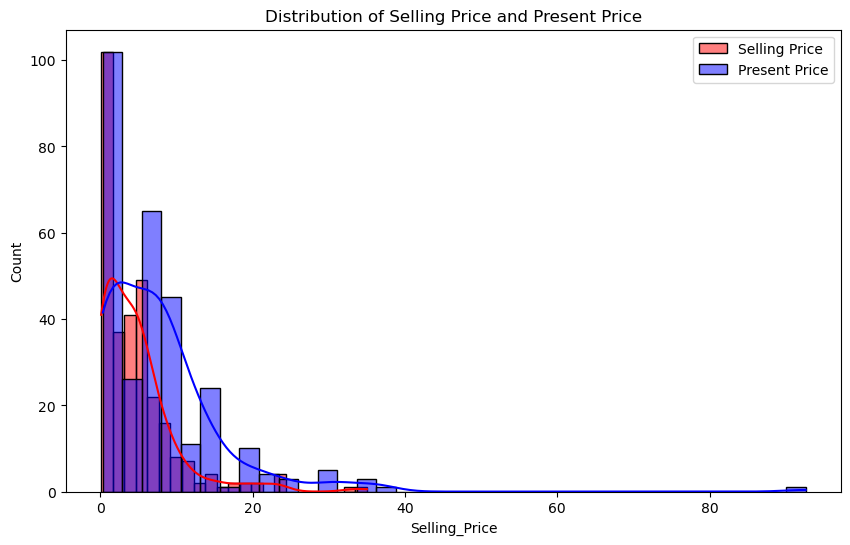

In [14]:
# Selling_Price and Present_Price Analysis
# Analyze the distribution of selling prices and present prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], kde=True, label='Selling Price', color='r')
sns.histplot(data['Present_Price'], kde=True, label='Present Price', color='b')
plt.title('Distribution of Selling Price and Present Price')
plt.legend()
plt.show()

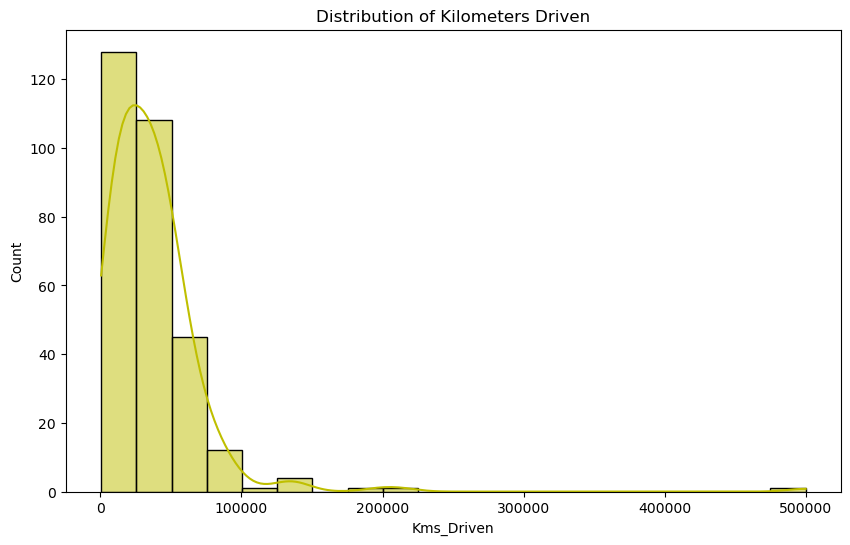

In [15]:
# Kms_Driven Analysis
# Analyze the distribution of kilometers driven
plt.figure(figsize=(10, 6))
sns.histplot(data['Kms_Driven'], bins=20, kde=True, color='y')
plt.title('Distribution of Kilometers Driven')
plt.show()

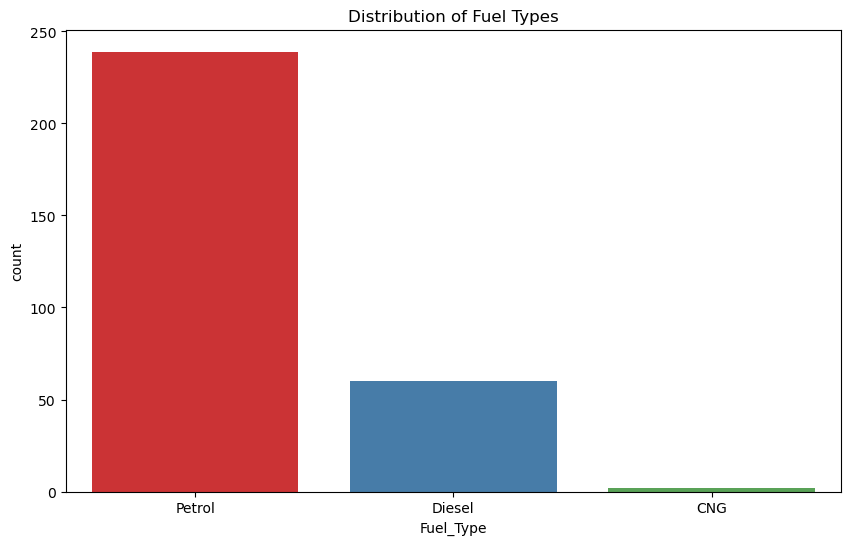

In [16]:
# Fuel_Type Analysis
# Check the distribution of fuel types
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', data=data, palette='Set1')
plt.title('Distribution of Fuel Types')
plt.show()

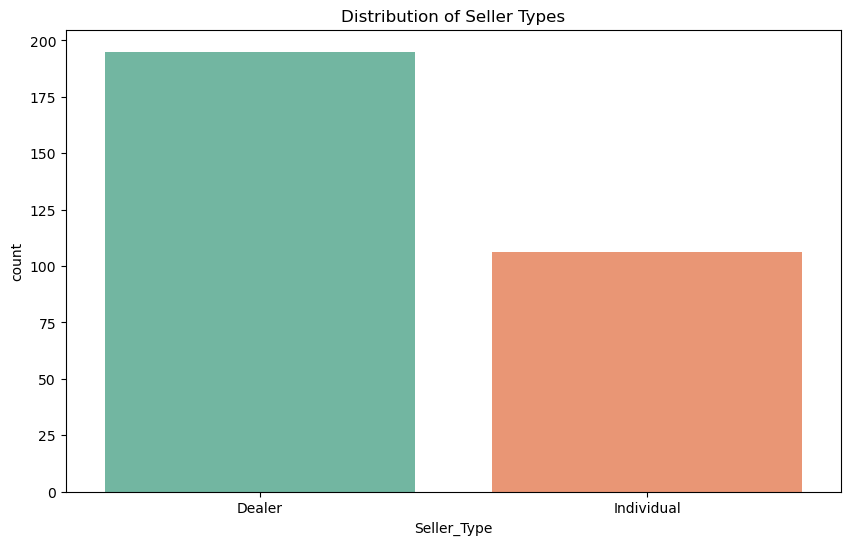

In [17]:
# Seller_Type Analysis
# Explore the distribution of seller types
plt.figure(figsize=(10, 6))
sns.countplot(x='Seller_Type', data=data, palette='Set2')
plt.title('Distribution of Seller Types')
plt.show()

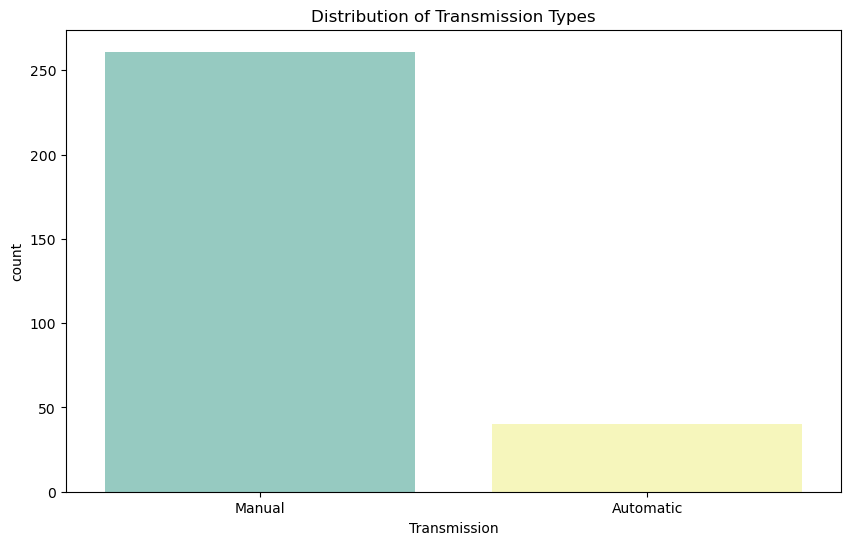

In [18]:
# Transmission Analysis
# Check the distribution of transmission types
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=data, palette='Set3')
plt.title('Distribution of Transmission Types')
plt.show()

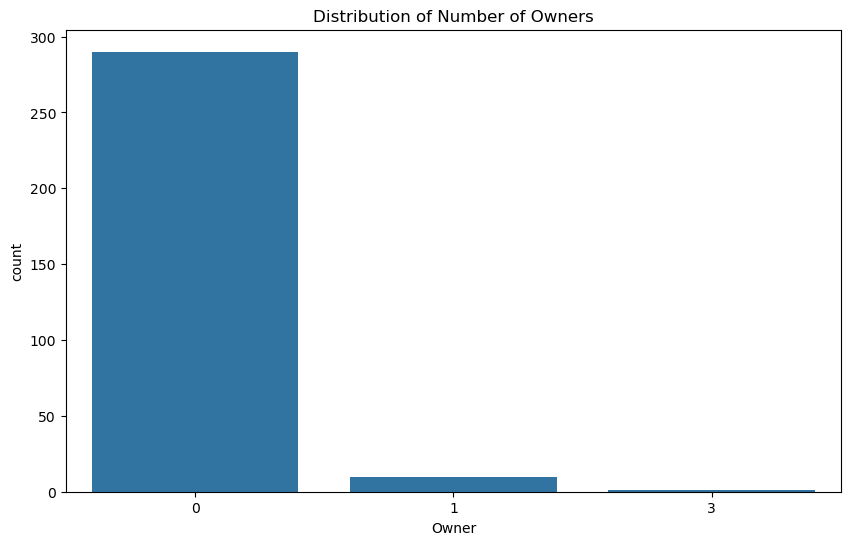

In [19]:
# Owner Analysis
# Explore the distribution of the number of owners
plt.figure(figsize=(10, 6))
sns.countplot(x='Owner', data=data)
plt.title('Distribution of Number of Owners')
plt.show() 

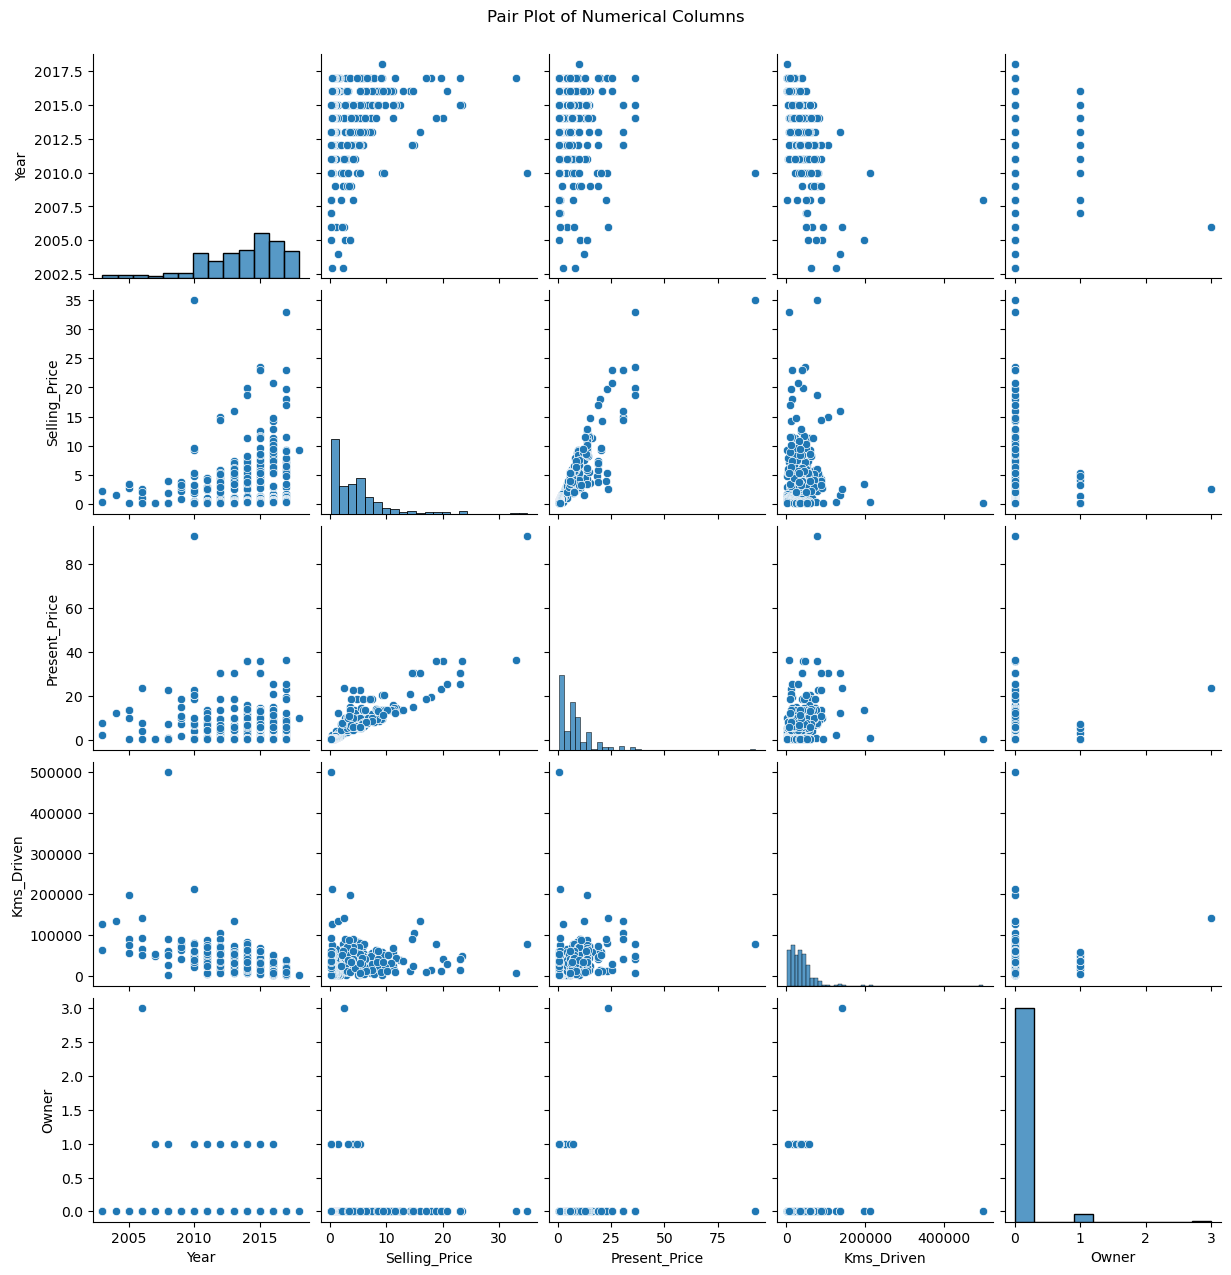

In [20]:
# Pair plot for numerical columns
sns.pairplot(data)
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

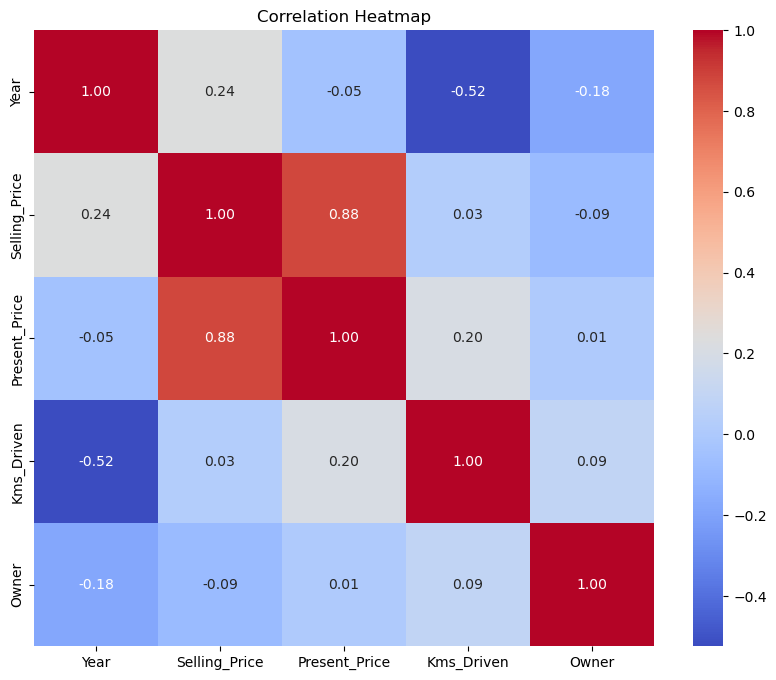

In [21]:
# Exclude non-numeric columns before creating the correlation heatmap
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [22]:
# Feature Engineering
from datetime import datetime
current_year = datetime.now().year

# Creating a new feature 'Age'
data['Age'] = current_year - data['Year']

In [23]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


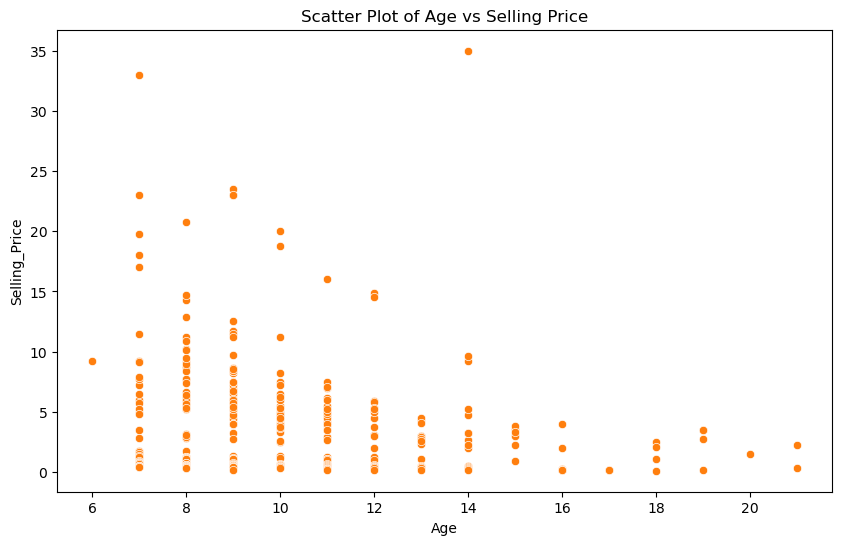

In [24]:
# Scatter plot for Age vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Selling_Price', data=data, color = 'C1')
plt.title('Scatter Plot of Age vs Selling Price')
plt.show()

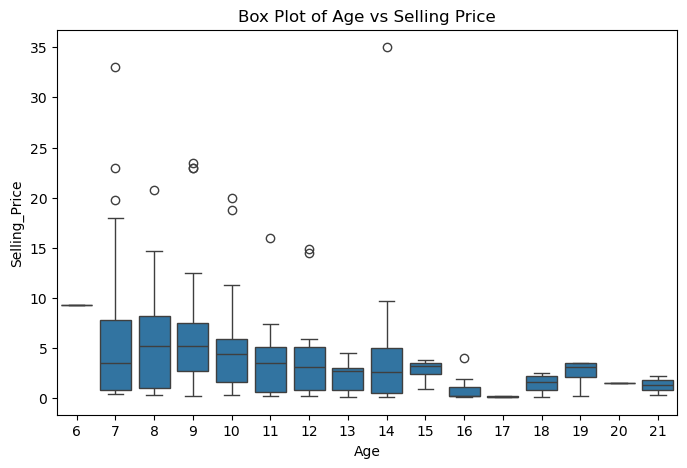

In [25]:
# Box plot for Age vs Selling Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age', y='Selling_Price', data=data)
plt.title('Box Plot of Age vs Selling Price')
plt.show() 

In [26]:
# Odometer Reading in Thousands
data['Kms_Driven_Thousands'] = data['Kms_Driven'] / 1000

In [27]:
# Vehicle Brand
data['Brand'] = data['Car_Name'].str.split().str[0]

In [28]:
# Vehicle Usage (Kms_Driven per Year)
data['Kms_Per_Year'] = data['Kms_Driven'] / data['Age']

In [29]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Kms_Driven_Thousands,Brand,Kms_Per_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10,27.00,ritz,2700.000000
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11,43.00,sx4,3909.090909
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7,6.90,ciaz,985.714286
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13,5.20,wagon,400.000000
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10,42.45,swift,4245.000000


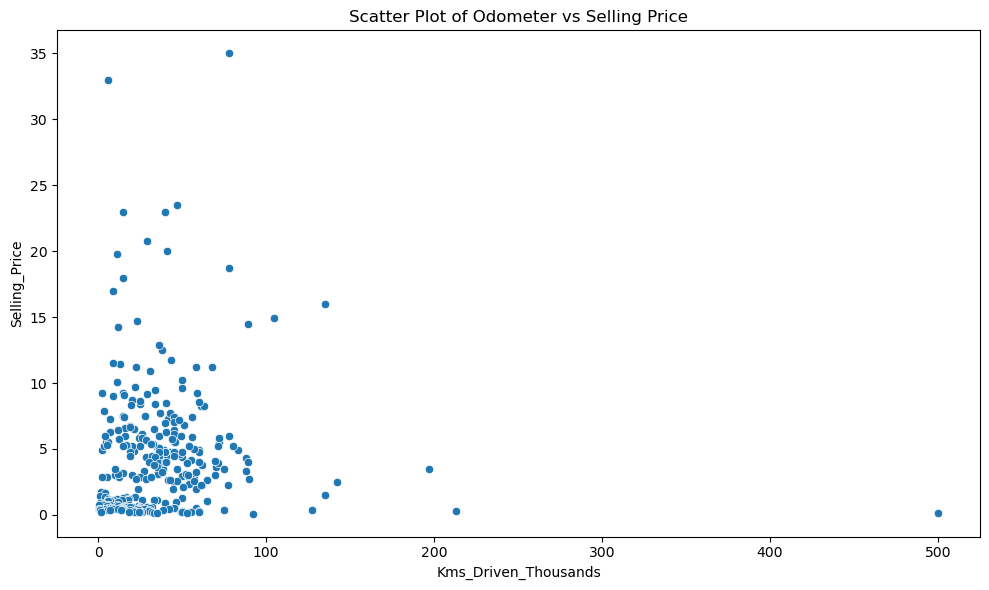

In [30]:
# Scatter plot for Odometer Reading in Thousands
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Driven_Thousands', y='Selling_Price', data=data, palette='Set1')
plt.title('Scatter Plot of Odometer vs Selling Price')
plt.tight_layout()
plt.show()

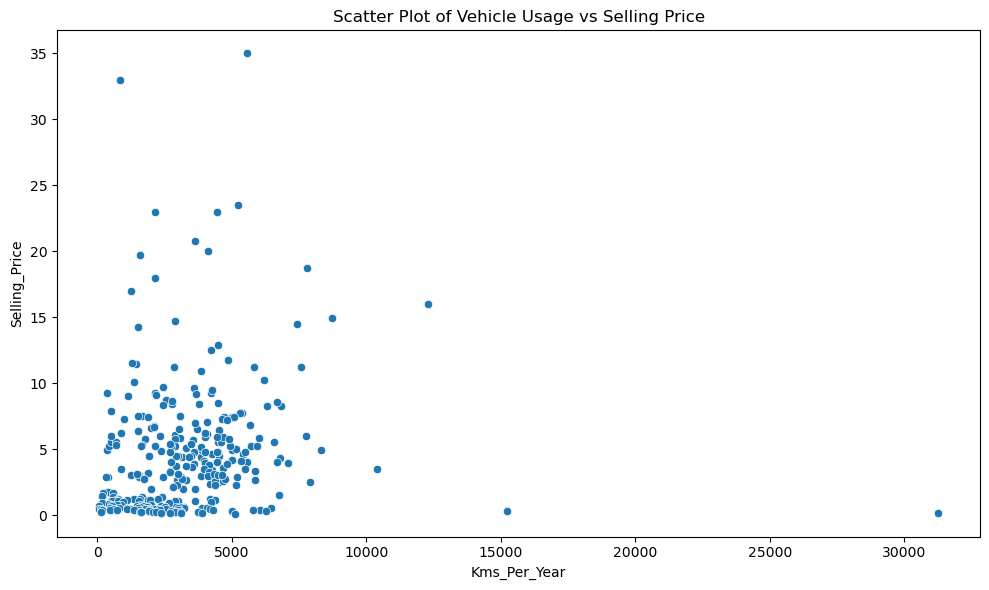

In [31]:
# Scatter plot for Vehicle Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kms_Per_Year', y='Selling_Price', data=data, palette='Set3')
plt.title('Scatter Plot of Vehicle Usage vs Selling Price')
plt.tight_layout()
plt.show() 

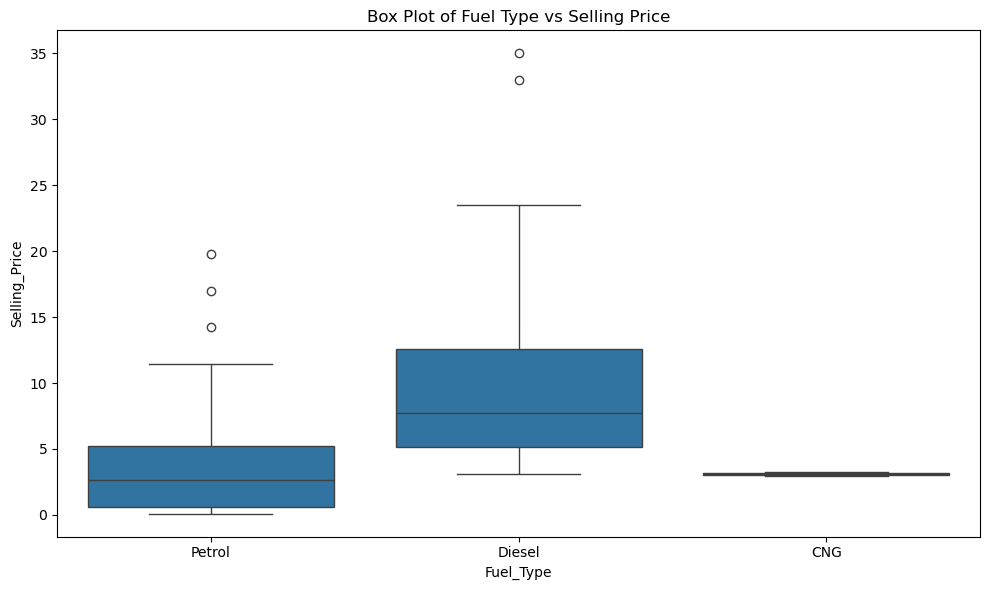

In [32]:
# Box plot for Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Box Plot of Fuel Type vs Selling Price')
plt.tight_layout()
plt.show() 

### Data Pre-processing or Cleaning

In [33]:
# Checking Duplicates Data

In [34]:
data.duplicated().sum()

2

In [35]:
data.drop_duplicates(inplace=True)

In [36]:
data.duplicated().sum()

0

In [37]:
# Checking Cardinality of Categorical features

In [38]:
data.select_dtypes(include='object').nunique()

Car_Name        98
Fuel_Type        3
Seller_Type      2
Transmission     2
Brand           44
dtype: int64

### Lets deal with missing values

In [39]:
data.isnull().sum()

Car_Name                0
Year                    0
Selling_Price           0
Present_Price           0
Kms_Driven              0
Fuel_Type               0
Seller_Type             0
Transmission            0
Owner                   0
Age                     0
Kms_Driven_Thousands    0
Brand                   0
Kms_Per_Year            0
dtype: int64

In [40]:
# So, no missing value

In [41]:
# Checking Total Number & Percentage of Missing Values in Training Dataset

In [42]:
df = (data.isnull().sum()[data.isnull().sum() > 0]).to_frame().rename(columns={0:'Number of Missing Values'})
df['% of Missing Values'] = round(100 * data.isnull().sum()[data.isnull().sum() > 0] / len(data), 2)

In [43]:
df

,Number of Missing Values,% of Missing Values


In [44]:
# Visualizing Missing Numbers

In [45]:
import missingno as msno

<Axes: >

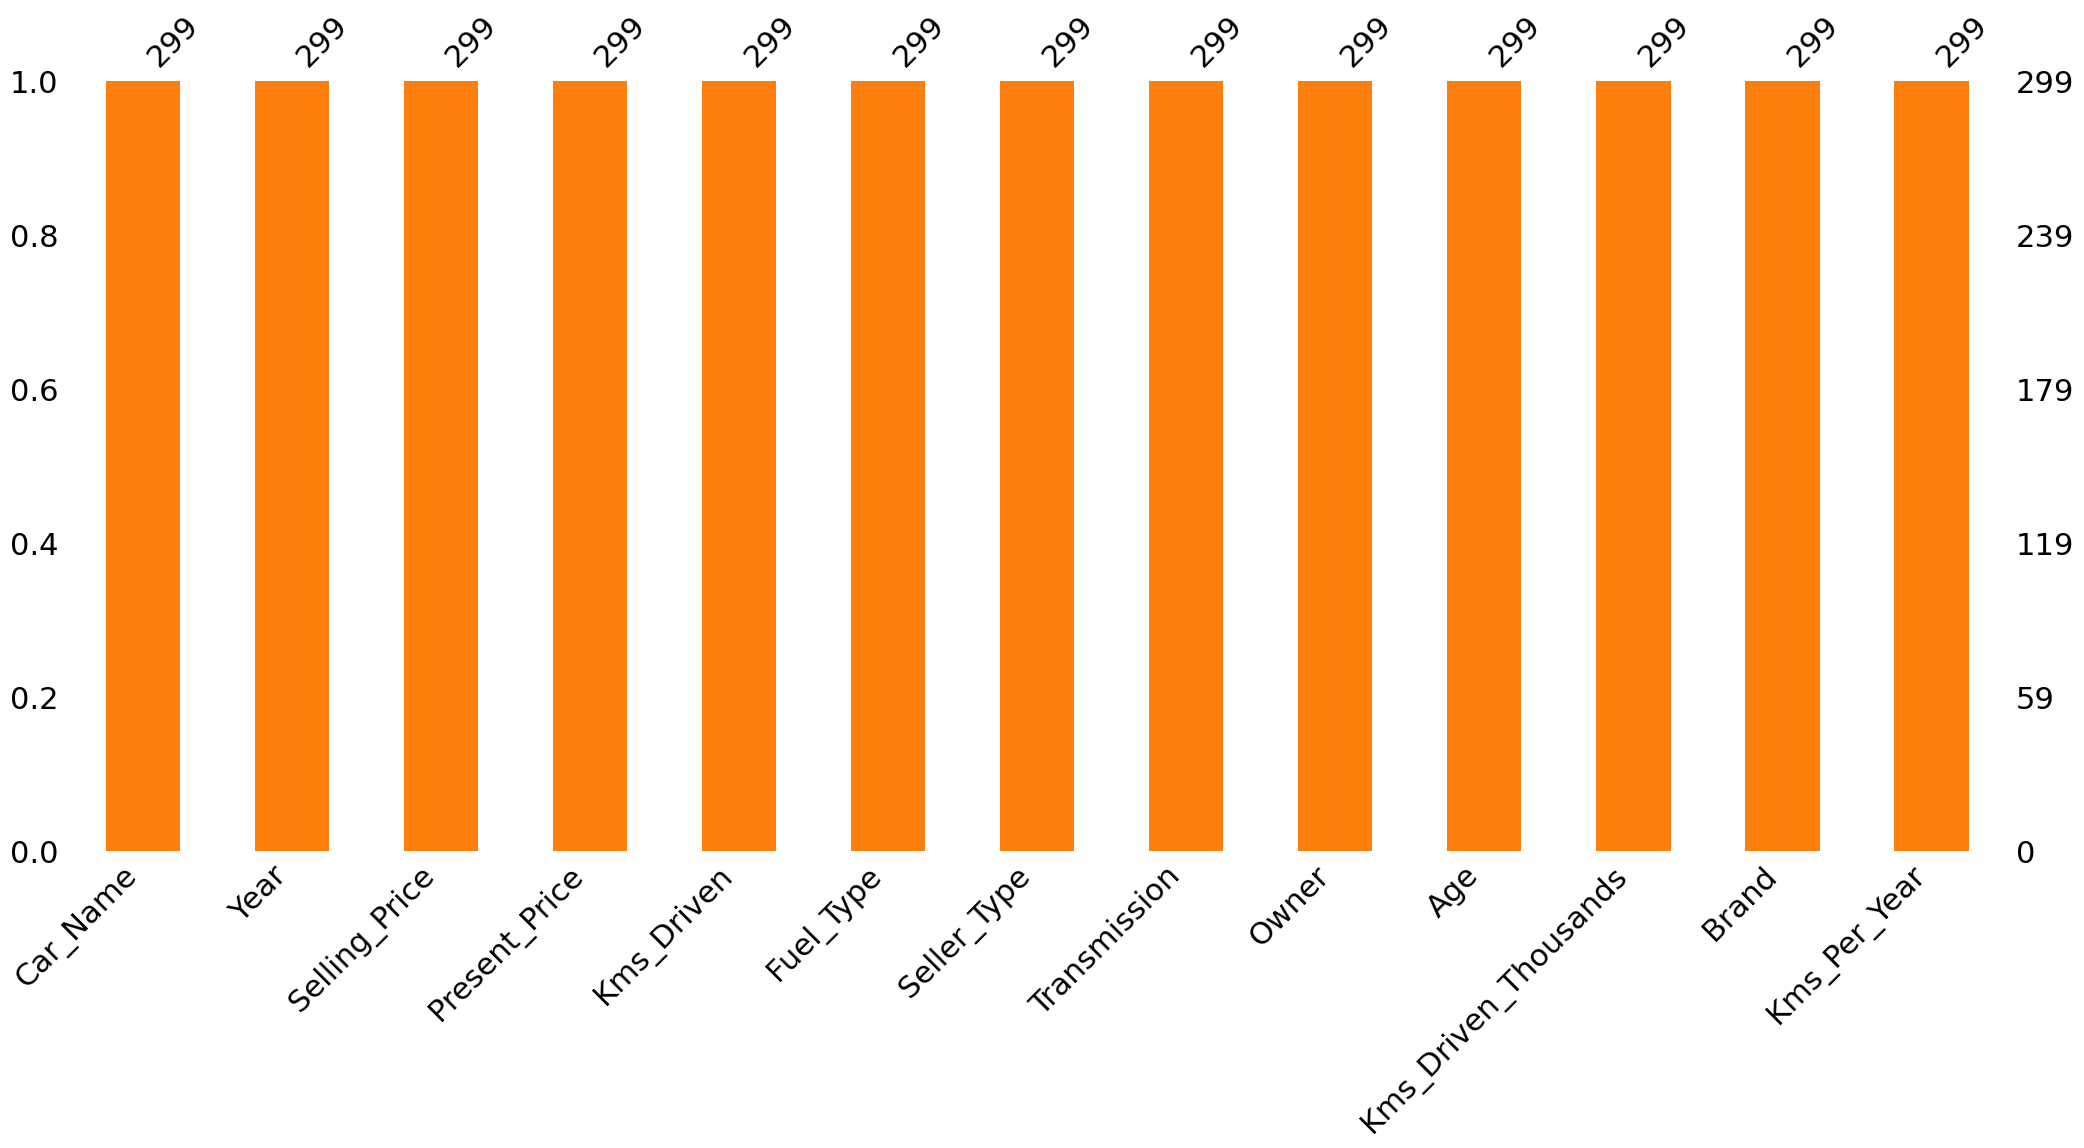

In [46]:
msno.bar(data, color='C1', fontsize=22)

In [47]:
# Another way to visualize missing Values

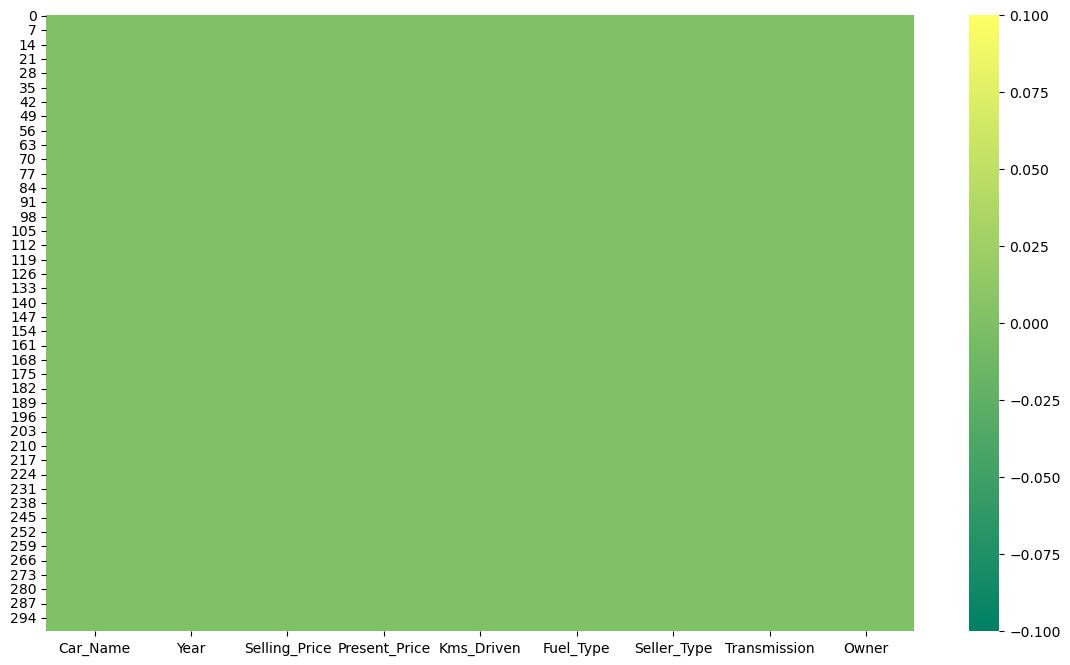

In [48]:
plt.figure(figsize=(14, 8))
sns.heatmap(train_df.isnull(), cmap='summer')
plt.show()

### Feature Encoding

In [49]:
# For Nominal data(have No order)  ==> One hot encoding
# For Ordinal data(have order) ==> Label enconding

In [50]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
num_cols = [col for col in data.columns if data[col].dtype!="object"] 

In [51]:
cat_cols

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Brand']

In [52]:
num_cols

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Age',
 'Kms_Driven_Thousands',
 'Kms_Per_Year']

In [53]:
data.dtypes

Car_Name                 object
Year                      int64
Selling_Price           float64
Present_Price           float64
Kms_Driven                int64
Fuel_Type                object
Seller_Type              object
Transmission             object
Owner                     int64
Age                       int64
Kms_Driven_Thousands    float64
Brand                    object
Kms_Per_Year            float64
dtype: object

In [54]:
data['Car_Name'].nunique()  # Target guided encoding

98

In [55]:
data['Fuel_Type'].nunique()  # Label encoding

3

In [56]:
data['Seller_Type'].nunique() # Label encoding

2

In [57]:
data['Transmission'].nunique() # Label encoding

2

In [58]:
data['Brand'].nunique()   # Target guided encoding

44

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:  # Label Encoding
    data[col] = le.fit_transform(data[col])

In [61]:
def target_guided_encoding(i_col, t_col): # Target guided encoding
    i_col_index = data.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key:index for index , key in enumerate(i_col_index , 0)}
    data[i_col] = data[i_col].map(i_col_dict) 

In [62]:
target_guided_encoding('Car_Name', 'Selling_Price')

In [63]:
target_guided_encoding('Brand', 'Selling_Price')

In [64]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Kms_Driven_Thousands,Brand,Kms_Per_Year
0,68,2014,3.35,5.59,27000,2,0,1,0,10,27.00,17,2700.000000
1,71,2013,4.75,9.54,43000,1,0,1,0,11,43.00,20,3909.090909
2,91,2017,7.25,9.85,6900,2,0,1,0,7,6.90,37,985.714286
3,65,2011,2.85,4.15,5200,2,0,1,0,13,5.20,15,400.000000
4,76,2014,4.60,6.87,42450,1,0,1,0,10,42.45,24,4245.000000


In [65]:
data.dtypes

Car_Name                  int64
Year                      int64
Selling_Price           float64
Present_Price           float64
Kms_Driven                int64
Fuel_Type                 int32
Seller_Type               int32
Transmission              int32
Owner                     int64
Age                       int64
Kms_Driven_Thousands    float64
Brand                     int64
Kms_Per_Year            float64
dtype: object

### Lets Perform outlier detection !

In [66]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot the distribution with kde
    sns.distplot(df[col], ax=ax1, color='b')
    ax1.set_title(f'Distribution of {col}')

    # Boxplot with custom whiskers
    sns.boxplot(df[col], ax=ax2, whis=1.5, color='g')
    ax2.set_title(f'Boxplot of {col}')

    # Distribution without kde (histogram)
    sns.histplot(df[col], ax=ax3, kde=False, bins=30, color='y')
    ax3.set_title(f'Histogram of {col}')

    # Apply log transformation if needed
    if (df[col] > 0).all():  # Check if all values are positive to avoid issues with log transformation
        ax1.set_yscale('log')
        ax3.set_yscale('log')

    plt.tight_layout()
    plt.show()

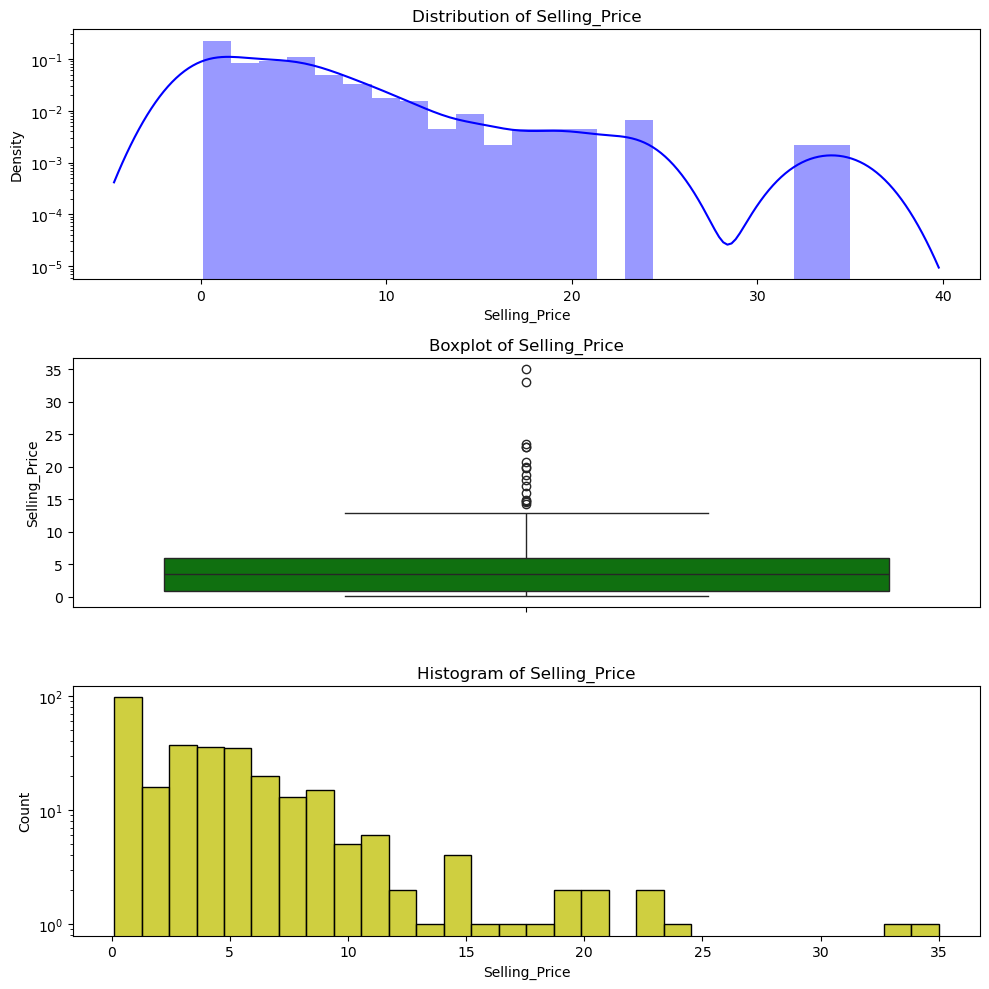

In [67]:
plot(data, 'Selling_Price')

In [68]:
q1 = data['Selling_Price'].quantile(0.25)
q3 = data['Selling_Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [69]:
maximum

13.725000000000001

In [70]:
minimum

-6.875

In [71]:
[x for x in data['Selling_Price'] if x> maximum or x<minimum] 

[14.9,
 23.0,
 18.0,
 16.0,
 19.99,
 18.75,
 23.5,
 33.0,
 19.75,
 14.25,
 14.5,
 14.73,
 23.0,
 35.0,
 20.75,
 17.0]

In [72]:
len([x for x in data['Selling_Price'] if x> maximum or x<minimum] )

16

### How to deal with Outlier

In [73]:
### wherever I have price >=20 just replace replace it with median of Price
data['Selling_Price'] = np.where(data['Selling_Price']>=1 , data['Selling_Price'].median() , data['Selling_Price'])

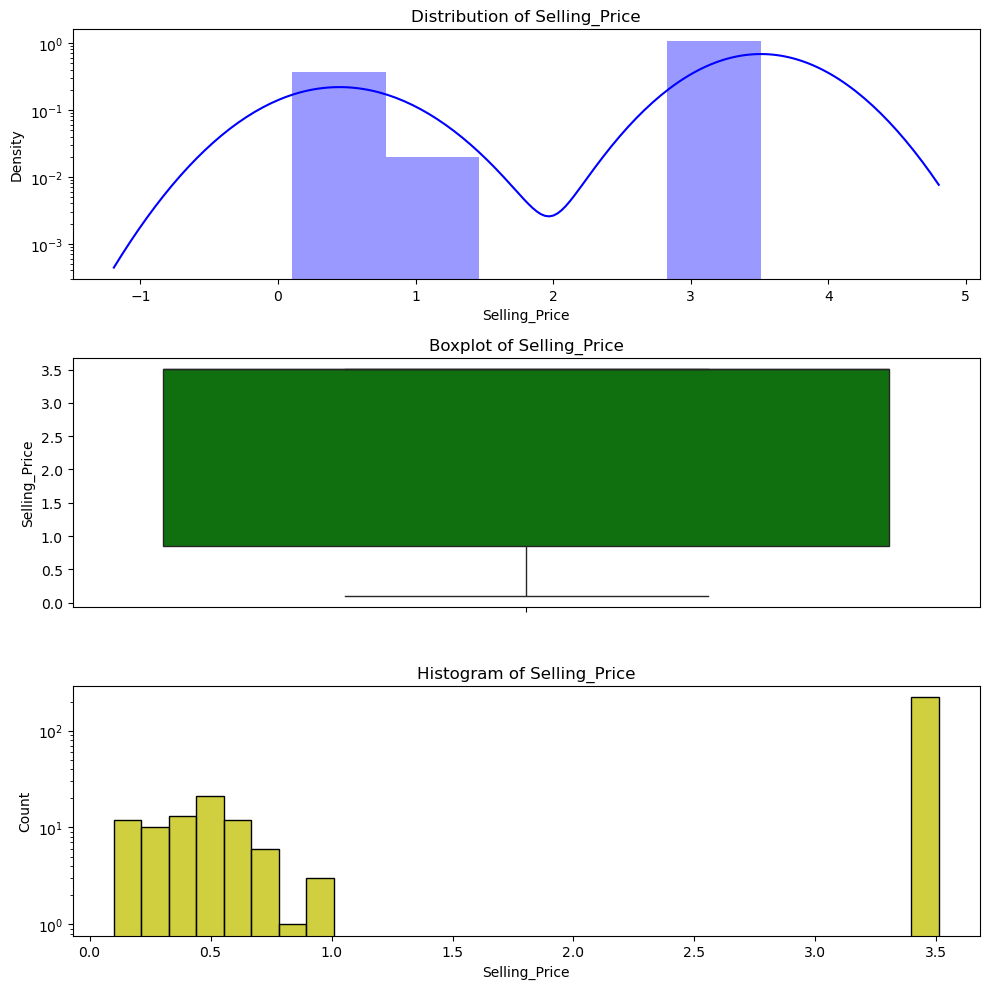

In [74]:
plot(data, 'Selling_Price')

### Lets Perform feature selection

In [75]:
X = data.drop(['Selling_Price'] , axis=1)

In [76]:
y = data['Selling_Price']

In [77]:
from sklearn.feature_selection import mutual_info_regression

In [78]:
imp = mutual_info_regression(X, y)

In [79]:
imp

array([0.83873176, 0.07916727, 0.5991263 , 0.05838924, 0.07237769,
       0.3501238 , 0.08868637, 0.03170344, 0.07461394, 0.06373412,
       0.52883725, 0.05951817])

In [80]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [81]:
imp_df

,0
Car_Name,0.838732
Year,0.079167
Present_Price,0.599126
Kms_Driven,0.058389
Fuel_Type,0.072378
Seller_Type,0.350124
Transmission,0.088686
Owner,0.031703
Age,0.074614
Kms_Driven_Thousands,0.063734


In [82]:
imp_df.columns = ['importance']

In [83]:
imp_df

,importance
Car_Name,0.838732
Year,0.079167
Present_Price,0.599126
Kms_Driven,0.058389
Fuel_Type,0.072378
Seller_Type,0.350124
Transmission,0.088686
Owner,0.031703
Age,0.074614
Kms_Driven_Thousands,0.063734


In [84]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Car_Name,0.838732
Present_Price,0.599126
Brand,0.528837
Seller_Type,0.350124
Transmission,0.088686
Year,0.079167
Age,0.074614
Fuel_Type,0.072378
Kms_Driven_Thousands,0.063734
Kms_Per_Year,0.059518


### Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
X_scaled

array([[ 0.0845664 ,  0.13299198, -0.22809681, ..., -0.25460295,
        -0.33336584, -0.23468909],
       [ 0.19727972, -0.21278716,  0.23369991, ...,  0.15618145,
        -0.10492492,  0.22718444],
       [ 0.94870182,  1.17032939,  0.26994218, ..., -0.77065085,
         1.18957358, -0.88954738],
       ...,
       [ 0.91113072, -1.59590371,  0.40438933, ...,  1.30981807,
         1.11342661,  0.97329889],
       [ 0.91113072,  1.17032939,  0.57975517, ..., -0.71673539,
         1.11342661, -0.77494718],
       [ 0.46027745,  0.82455025, -0.19185453, ..., -0.80751874,
         0.27580993, -1.00518444]])

### Lets Build ML model

### split dataset into train & test

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# Splitting Data For Model Which Don't Need Scaled Data.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [90]:
X_train.shape

(224, 12)

In [91]:
X_test.shape

(75, 12)

In [92]:
y_train.shape

(224,)

In [93]:
y_test.shape

(75,)

In [94]:
# Splitting Data For Model Which Need Scaled Data.

In [95]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [96]:
X_train1.shape

(224, 12)

In [97]:
X_test1.shape

(75, 12)

In [98]:
y_train1.shape

(224,)

In [99]:
y_test1.shape

(75,)

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
ml_model = RandomForestRegressor()

In [102]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [103]:
y_pred = ml_model.predict(X_test)

In [104]:
y_pred

array([3.51  , 3.51  , 0.4171, 3.51  , 3.51  , 3.51  , 3.51  , 3.51  ,
       3.51  , 0.3483, 3.51  , 0.2192, 0.316 , 0.4762, 3.51  , 3.51  ,
       0.5041, 3.51  , 3.51  , 0.5779, 0.6087, 3.51  , 3.51  , 3.51  ,
       3.51  , 3.51  , 3.51  , 3.4809, 3.51  , 3.51  , 3.51  , 3.51  ,
       3.51  , 3.51  , 3.51  , 3.51  , 3.4814, 0.2962, 3.51  , 3.51  ,
       3.51  , 3.51  , 3.4548, 3.51  , 0.6494, 0.2273, 3.51  , 3.51  ,
       3.51  , 0.2771, 0.6466, 0.3248, 3.51  , 3.51  , 3.51  , 3.51  ,
       3.51  , 3.51  , 3.51  , 3.51  , 3.51  , 0.4119, 0.2358, 0.4623,
       3.51  , 3.51  , 3.51  , 3.51  , 3.51  , 3.51  , 0.7441, 3.51  ,
       3.51  , 3.51  , 0.4079])

In [105]:
from sklearn import metrics

In [106]:
metrics.r2_score(y_test , y_pred)

0.9991305120331393

### How to automate ml pipeline & How to define your Evaluation metric..

### How to automate ml pipeline & How to define your Evaluation metric..

In [107]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100   

In [108]:
mape(y_test, y_pred)

5.930341020696377

### How to automate ml pipeline !

### Model Building For Scaled Data

In [109]:
evaluation_results = []

In [110]:
# If you are using LogisticRegression for a regression problem, it will not work because logistic
# regression is a classification algorithm and is not designed for predicting continuous values.

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')

    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)

    # Calculating and printing evaluation metrics for regression
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-5000, 5000)
    plt.ylim(0, 0.0007)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [111]:
# 1. Linear Regression Model

In [112]:
from sklearn.linear_model import LinearRegression

Training score : 0.84650372338074
Testing score : 0.8271303387819099
R2 score : 0.8271303387819099
MAE : 0.37404100303033794
MSE : 0.3165495994171952
RMSE : 0.5626274072751835


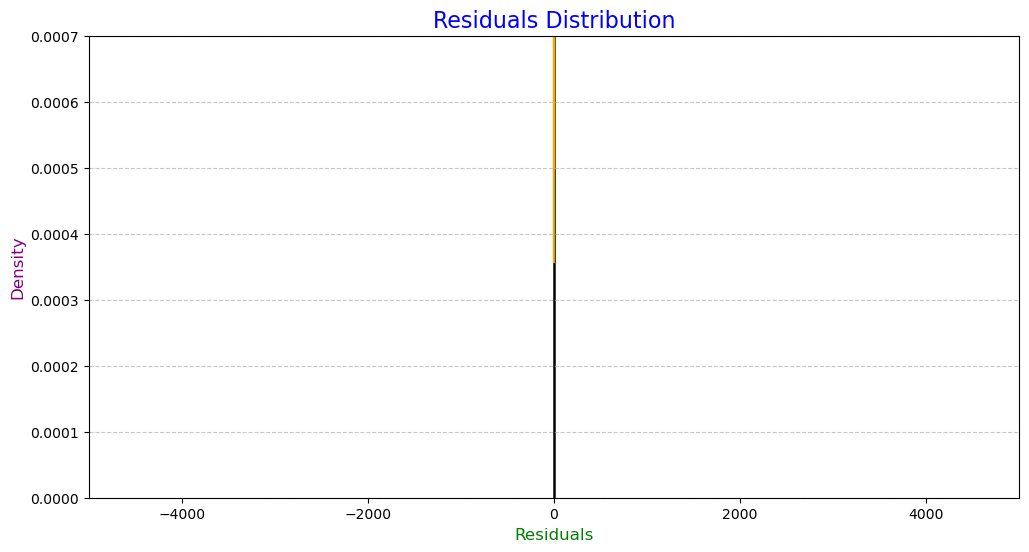

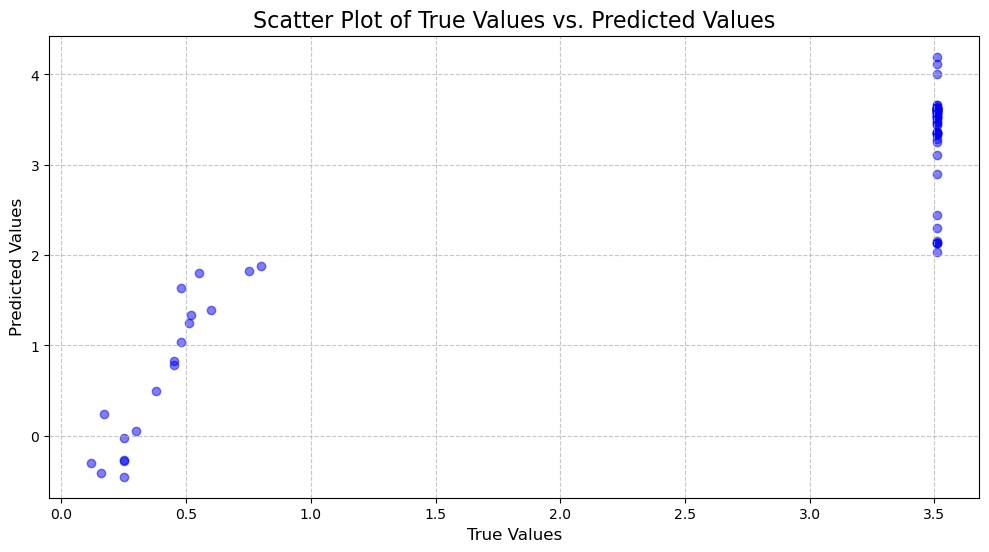

In [113]:
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train1, y_train1, X_test1, y_test1)

In [114]:
# 2.SVM Model 

In [115]:
from sklearn.svm import SVR

Training score : 0.8562149256908573
Testing score : 0.7496857327832429
R2 score : 0.7496857327832429
MAE : 0.3609723275228713
MSE : 0.45836198473200584
RMSE : 0.6770243605159314


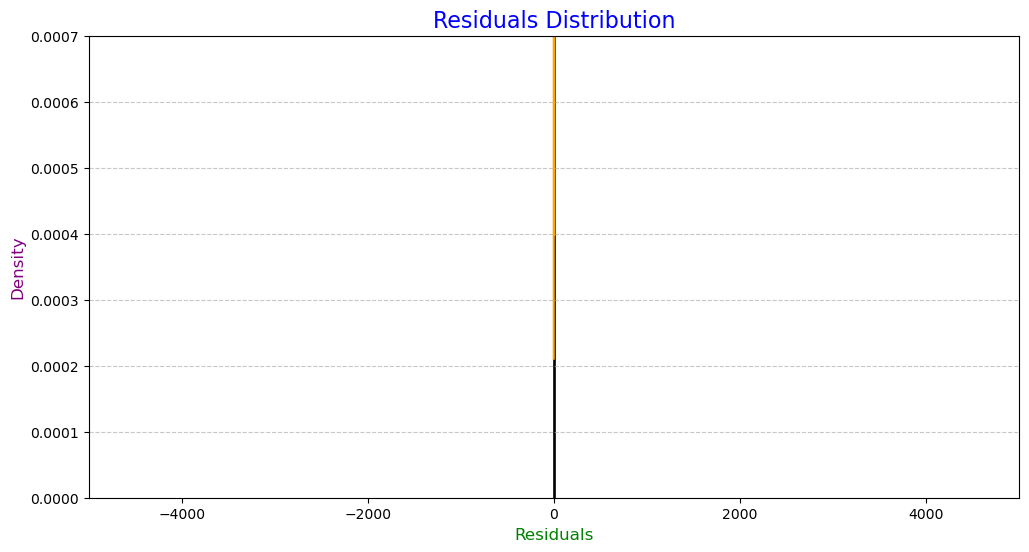

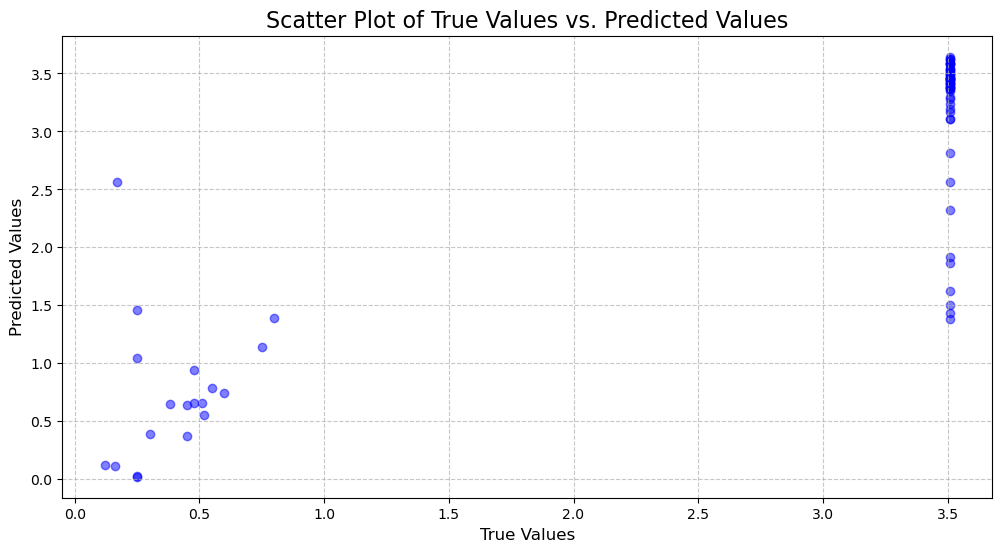

In [116]:
evaluate_model_regression(SVR(), 'SVM', X_train1, y_train1, X_test1, y_test1)

### Model Building For UnScaled Data

In [117]:
# If you are using LogisticRegression for a regression problem, it will not work because logistic
# regression is a classification algorithm and is not designed for predicting continuous values.

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')

    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)

    # Calculating and printing evaluation metrics for regression
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-5000, 5000)
    plt.ylim(0, 0.0007)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [118]:
# 3. Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor

Training score : 1.0
Testing score : 0.9977558680773142
R2 score : 0.9977558680773142
MAE : 0.022400000000004645
MSE : 0.004109333333333334
RMSE : 0.06410408203330997


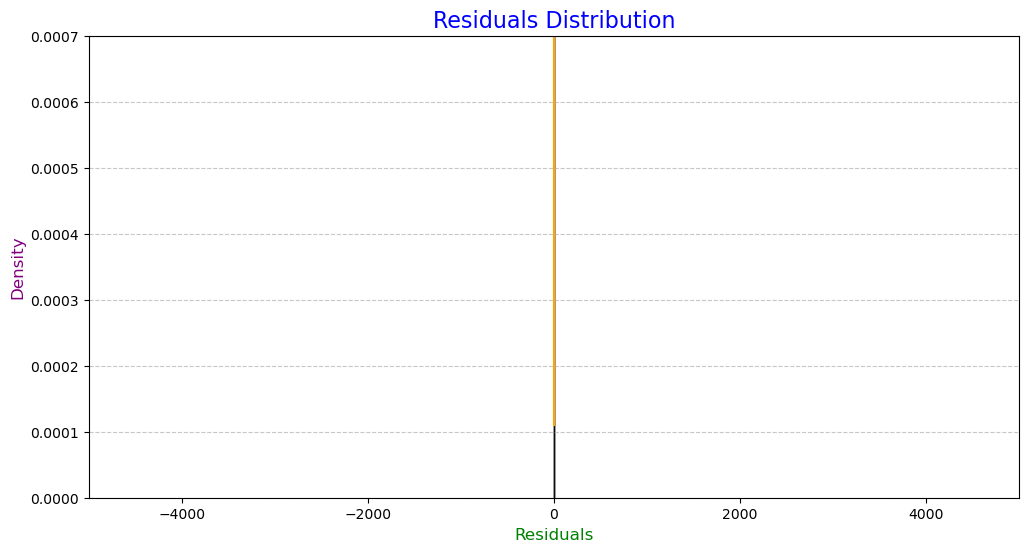

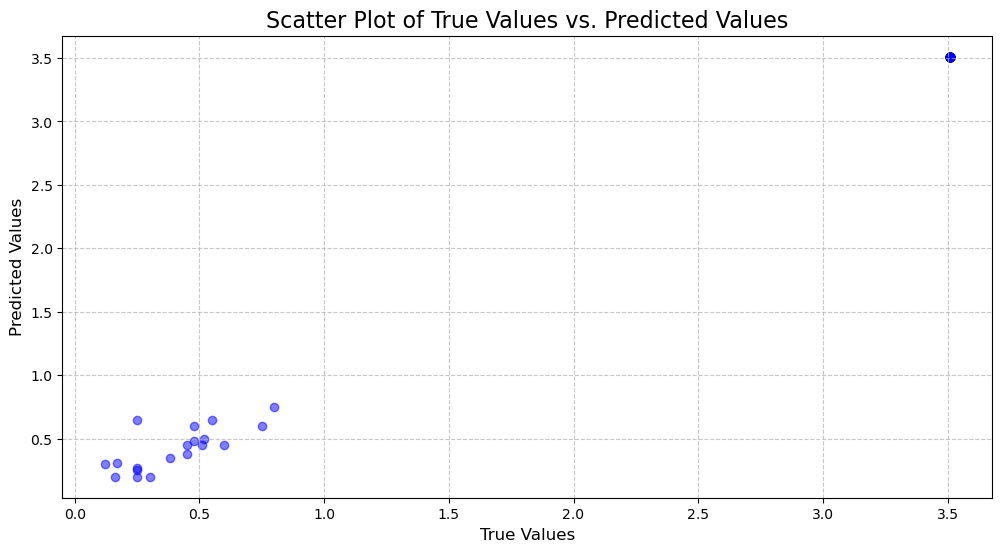

In [120]:
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [121]:
# 4. Random Forest Regressor Model

In [122]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.99836325285108
Testing score : 0.9991681715813074
R2 score : 0.9991681715813074
MAE : 0.016452000000005577
MSE : 0.0015231993333333397
RMSE : 0.03902818639564667


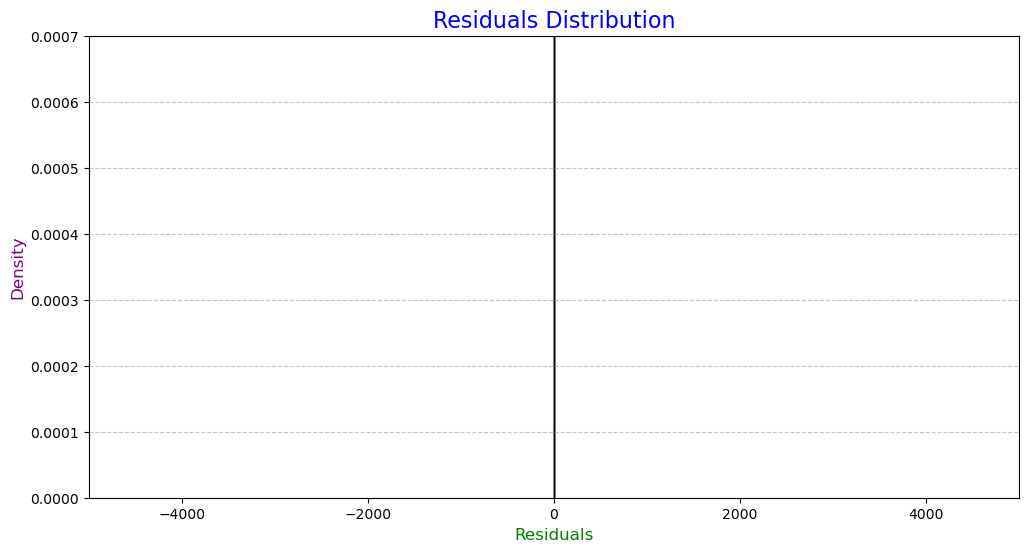

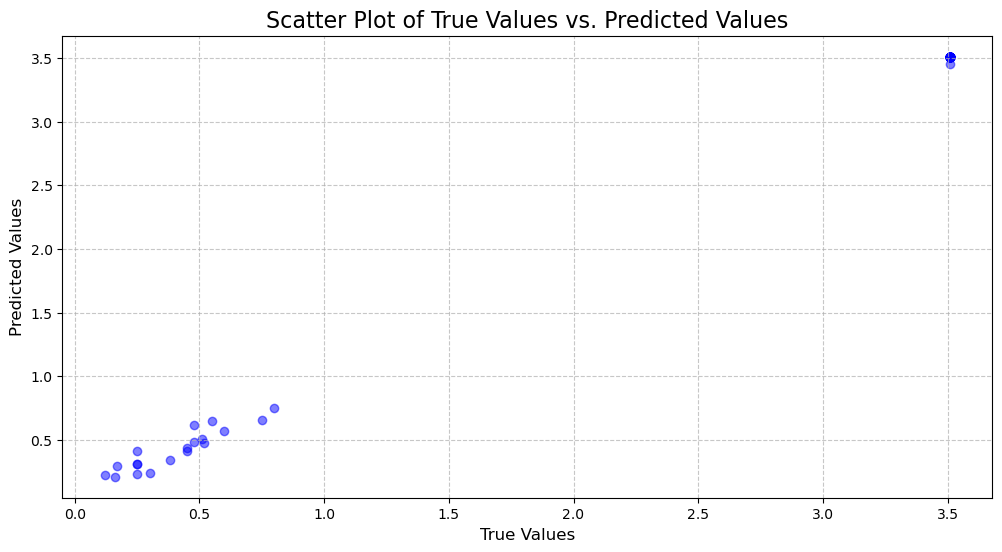

In [123]:
evaluate_model_regression(RandomForestRegressor(), 'Random Forest', X_train, y_train, X_test, y_test)

In [124]:
# 5. XG Boost Regressor Model

In [125]:
from xgboost import XGBRegressor

Training score : 0.9999996270427138
Testing score : 0.9982197334002456
R2 score : 0.9982197334002456
MAE : 0.02022549241383856
MSE : 0.003259928173845987
RMSE : 0.057095780700906325


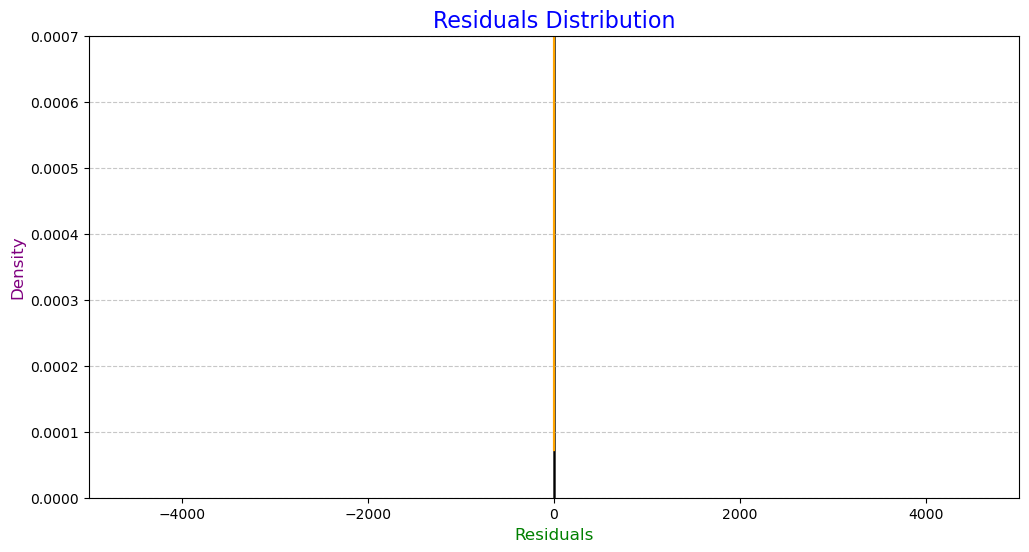

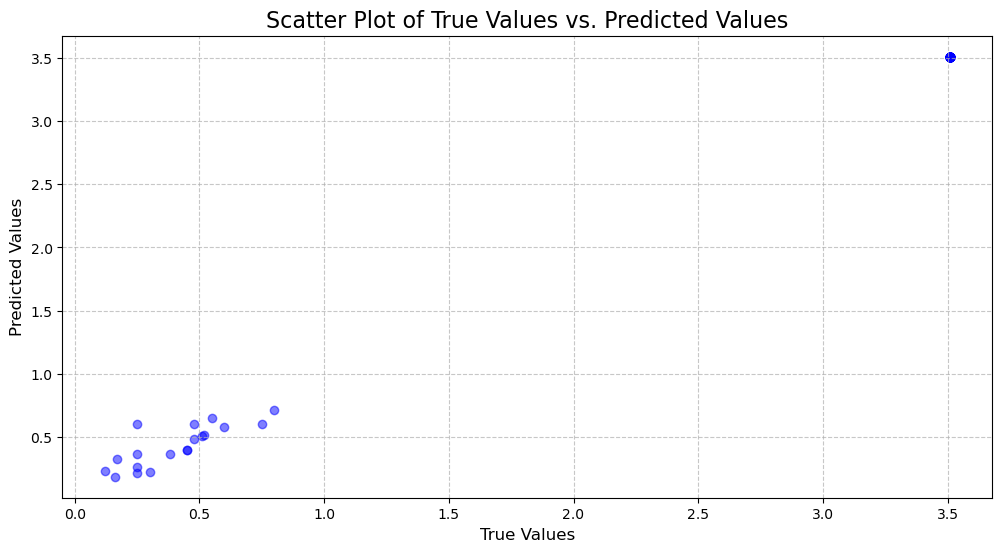

In [126]:
evaluate_model_regression(XGBRegressor(), 'XG Boost', X_train, y_train, X_test, y_test)

In [127]:
# 6. CatBoost Regressor Model

In [128]:
from catboost import CatBoostRegressor

Learning rate set to 0.032324
0:	learn: 1.3056383	total: 144ms	remaining: 2m 23s
1:	learn: 1.2734250	total: 147ms	remaining: 1m 13s
2:	learn: 1.2423435	total: 151ms	remaining: 50.1s
3:	learn: 1.2102021	total: 154ms	remaining: 38.4s
4:	learn: 1.1815056	total: 158ms	remaining: 31.4s
5:	learn: 1.1514306	total: 161ms	remaining: 26.7s
6:	learn: 1.1204659	total: 163ms	remaining: 23.2s
7:	learn: 1.0940898	total: 167ms	remaining: 20.7s
8:	learn: 1.0634231	total: 169ms	remaining: 18.6s
9:	learn: 1.0375558	total: 172ms	remaining: 17s
10:	learn: 1.0121667	total: 174ms	remaining: 15.7s
11:	learn: 0.9871753	total: 178ms	remaining: 14.6s
12:	learn: 0.9603772	total: 181ms	remaining: 13.8s
13:	learn: 0.9384973	total: 185ms	remaining: 13s
14:	learn: 0.9147896	total: 188ms	remaining: 12.3s
15:	learn: 0.8929886	total: 191ms	remaining: 11.7s
16:	learn: 0.8706531	total: 194ms	remaining: 11.2s
17:	learn: 0.8496061	total: 199ms	remaining: 10.9s
18:	learn: 0.8305299	total: 203ms	remaining: 10.5s
19:	learn: 0.

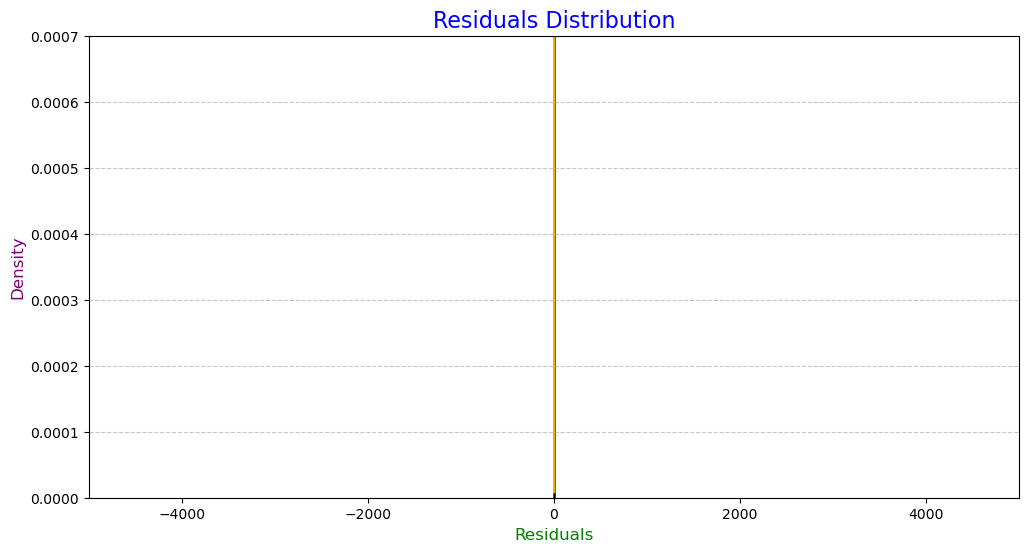

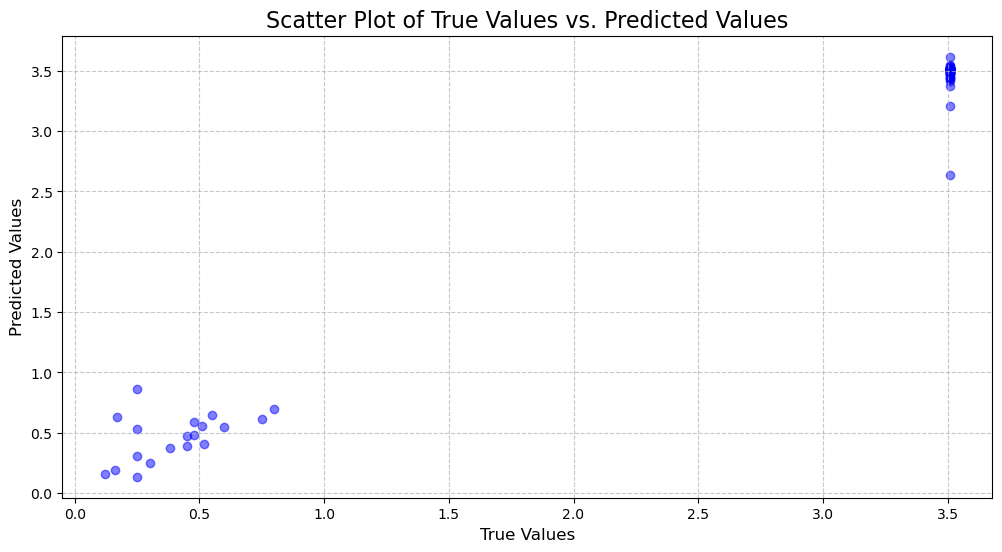

In [129]:
evaluate_model_regression(CatBoostRegressor(), 'Cat Boost', X_train, y_train, X_test, y_test)

In [130]:
# 7. LGBM Model

In [131]:
from lightgbm import LGBMRegressor

Training score : 0.9951206456211295
Testing score : 0.9852161160802339
R2 score : 0.9852161160802339
MAE : 0.04702647168875213
MSE : 0.027071450824030206
RMSE : 0.16453404153557466


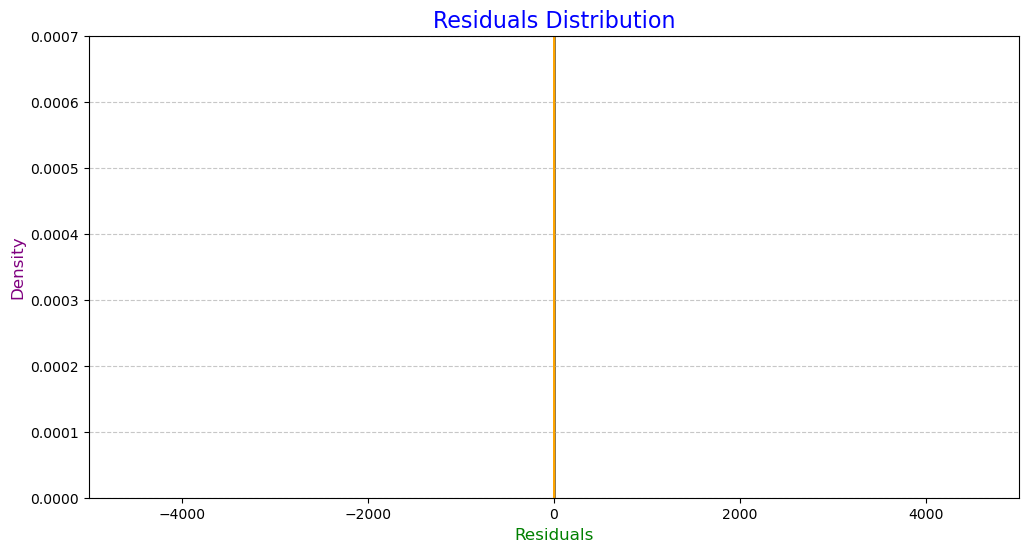

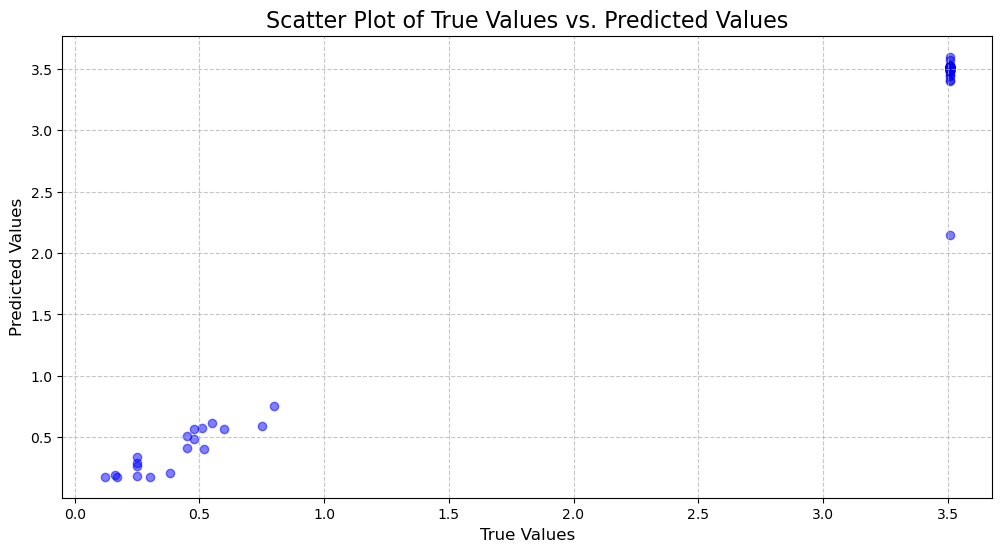

In [132]:
evaluate_model_regression(LGBMRegressor(verbose=-1), 'LGBM', X_train, y_train, X_test, y_test)

### All Model Performance Comparison

In [133]:
df_results = pd.DataFrame(evaluation_results)

In [134]:
df_results

,Model,Training Score,Testing Score
0,Linear Regression,0.846504,0.827130
1,SVM,0.856215,0.749686
2,Decision Tree,1.000000,0.997756
3,Random Forest,0.998363,0.999168
4,XG Boost,1.000000,0.998220
5,Cat Boost,0.999937,0.987774
6,LGBM,0.995121,0.985216


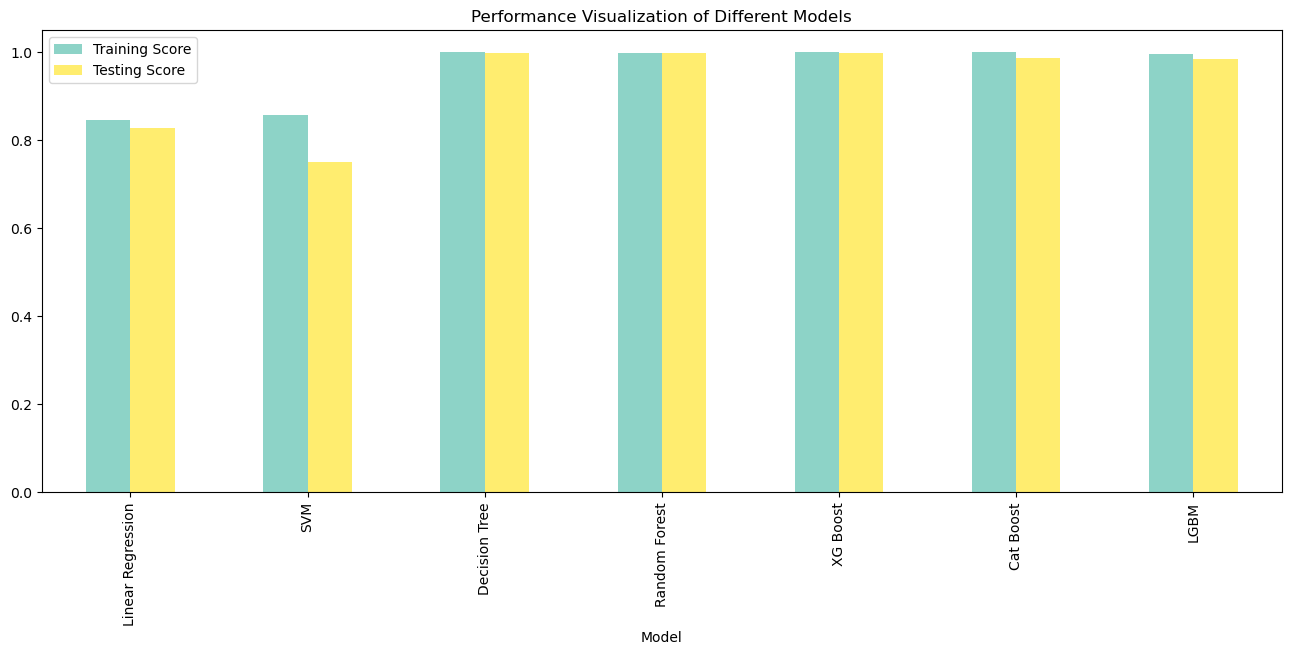

In [135]:
df_results.plot(x="Model",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set3")
plt.show()

### Hyper-Parameter Tunning of LGBM Model

In [136]:
model1 = LGBMRegressor(verbose=-1)

In [137]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}     

In [138]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [139]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [140]:
grid_search1.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMRegressor(verbose=-1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [141]:
grid_search1.best_score_

0.9832727520989419

In [142]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.03,
 'n_estimators': 650,
 'num_leaves': 16,
 'random_state': 0}

In [143]:
# Creating LGBM Model Using Best Parameters.

In [144]:
model1 = LGBMRegressor(**best_parameters1, verbose=-1)

In [145]:
model1.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.03, n_estimators=650, num_leaves=16,
              random_state=0, verbose=-1)

In [146]:
X_test_pred1 = model1.predict(X_test)

In [147]:
metrics.r2_score(y_test, X_test_pred1)

0.9872731878705168

### Hyper-Parameter Tunning of CatBoost Model

In [148]:
model2 = CatBoostRegressor(verbose=False)

In [149]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [150]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [151]:
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001E34FDFBCD0>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [152]:
grid_search2.best_score_

0.976437402304472

In [153]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 50, 'learning_rate': 0.5, 'random_state': 0}

In [154]:
# Creating Cat Boost Model Using Best Parameters

In [155]:
model2 = CatBoostRegressor(**best_parameters2,verbose=False)

In [156]:
model2.fit(X_train,y_train)

In [157]:
X_test_pred2 = model2.predict(X_test)

In [158]:
metrics.r2_score(y_test, X_test_pred2)

0.9939152955601408

### Hyper-Parameter Tunning of XGBoost Model

In [159]:
model3 = XGBRegressor()

In [160]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [161]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [162]:
grid_search3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [163]:
grid_search3.best_score_

0.983946167907102

In [164]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.5, 'n_estimators': 50, 'random_state': 0}

In [165]:
# Creating XGBoost Model Using Best Parameters

In [166]:
model3 = XGBRegressor(**best_parameters3)

In [167]:
model3.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [168]:
X_test_pred3 = model3.predict(X_test)

In [169]:
metrics.r2_score(y_test, X_test_pred3)

0.9981424335924013

### Hyper Parameter Tunning of RandomForest Model

In [170]:
model4 = RandomForestRegressor()

In [171]:
parameters4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [172]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [173]:
grid_search4.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [174]:
grid_search4.best_score_

0.9835098943245841

In [175]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 100}

In [176]:
# Creating Random Forest Model Using Best Parameters

In [177]:
model4 = RandomForestRegressor(**best_parameters4)

In [178]:
model4.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, min_samples_leaf=4, min_samples_split=7)

In [179]:
X_test_pred4 = model4.predict(X_test)

In [180]:
metrics.r2_score(y_test, X_test_pred4)

0.9992288496555464

### Hyper Parameter Tunning of Decision Tree Model

In [181]:
model5 = DecisionTreeRegressor()

In [182]:
parameters5 = {
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6],
                'min_impurity_decrease': [0.0, 0.1, 0.2]} 

In [183]:
grid_search5 = GridSearchCV(model5, parameters5, cv=5, n_jobs=-1)

In [184]:
grid_search5.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9]})

In [185]:
grid_search5.best_score_

0.9821624073109805

In [186]:
best_parameters5 = grid_search5.best_params_
best_parameters5

{'max_depth': 12,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [187]:
# Creating Decision Tree Model Using Best Parameters

In [188]:
model5 = DecisionTreeRegressor(**best_parameters5)

In [189]:
model5.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=4, min_samples_split=9)

In [190]:
X_test_pred5 = model5.predict(X_test)

In [191]:
metrics.r2_score(y_test, X_test_pred5)

0.9988500693329214

### Stacking Classifier Model

In [192]:
from sklearn.ensemble import StackingRegressor

In [193]:
stacking_model = StackingRegressor(estimators=[('LGBM', model1), 
                                                ('CAT Boost', model2),
                                                ("XGBoost", model3),
                                                ('RF', model4),
                                                ('DT', model5)], verbose=False)

In [194]:
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('LGBM',
                               LGBMRegressor(learning_rate=0.03,
                                             n_estimators=650, num_leaves=16,
                                             random_state=0, verbose=-1)),
                              ('CAT Boost',
                               <catboost.core.CatBoostRegressor object at 0x000001E3524A07D0>),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...)),
                              ('RF',
                               RandomForestRegressor(max_depth=11,
                                                     min_samples_leaf=4,
                                                     min_samples_split=7)),
                              ('DT',
                               DecisionTreeRegressor(max_depth=12,
                                                     min_samples_leaf=4,
                                                     min_samples_split=9))],
                  verbose=False)

In [195]:
X_train_pred5 = stacking_model.predict(X_train)

In [196]:
X_test_pred5 = stacking_model.predict(X_test)

In [197]:
print("Stacking Model R2 Score on Training Data is:", metrics.r2_score(y_train, X_train_pred5)*100)

Stacking Model R2 Score on Training Data is: 99.93048505289974


In [198]:
print("Stacking Model R2 Score on Testing Data is:", metrics.r2_score(y_test, X_test_pred5)*100)

Stacking Model R2 Score on Testing Data is: 99.7567717507056


### Please Upvote, Comment and Support !! 😊🚀

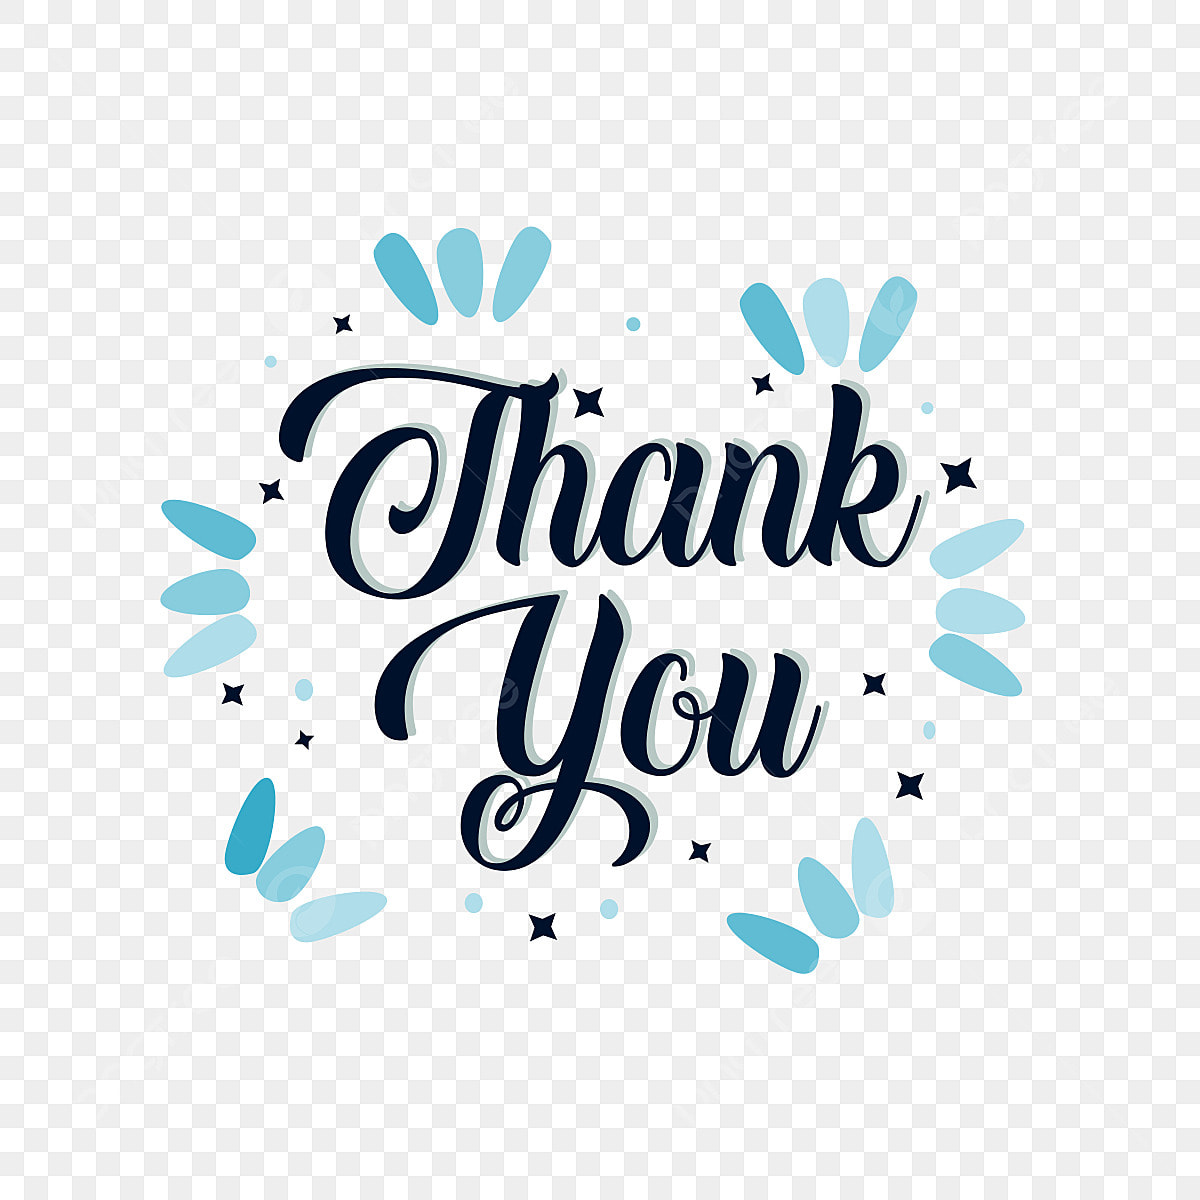